<a href="https://colab.research.google.com/github/daniel-isaac/Curso-Python/blob/main/Red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
diabetes_train = pd.read_csv('/content/diabetes_train - diabetes_train.csv')
diabetes_train

In [ ]:
X = diabetes_train.iloc[ : , 0:8 ].values
X

In [ ]:
y = diabetes_train.iloc[ : , 8].values
y

#Definir la estructura de la red neuronal


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(12, input_dim=8, activation='relu'))

In [ ]:
model.add(Dense(8, activation='relu'))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

##Modelo de compilacion de la red

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']


)

##Entrenamiento de una red neuronal

In [ ]:
historial = model.fit(X, y, epochs=1000, batch_size=10)

Epoch 1/1000
75/75 [==============================] - 1s 3ms/step - loss: 257.5762 - accuracy: 0.5221
Epoch 2/1000
75/75 [==============================] - 0s 2ms/step - loss: 55.7777 - accuracy: 0.5703
Epoch 3/1000
75/75 [==============================] - 0s 2ms/step - loss: 46.2961 - accuracy: 0.5810
Epoch 4/1000
75/75 [==============================] - 0s 2ms/step - loss: 39.1529 - accuracy: 0.5649
Epoch 5/1000
75/75 [==============================] - 0s 2ms/step - loss: 26.7274 - accuracy: 0.6225
Epoch 6/1000
75/75 [==============================] - 0s 2ms/step - loss: 19.8538 - accuracy: 0.6278
Epoch 7/1000
75/75 [==============================] - 0s 2ms/step - loss: 16.0596 - accuracy: 0.6145
Epoch 8/1000
75/75 [==============================] - 0s 2ms/step - loss: 13.1751 - accuracy: 0.6372
Epoch 9/1000
75/75 [==============================] - 0s 2ms/step - loss: 8.3150 - accuracy: 0.6305
Epoch 10/1000
75/75 [==============================] - 0s 2ms/step - loss: 9.6422 - accurac

##Visualizar funcion de perdidad

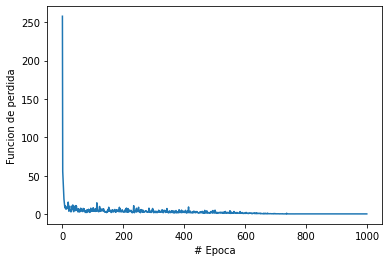

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Funcion de perdida")
plt.plot(historial.history['loss'])

##Test

In [ ]:
diabetes_test = pd.read_csv('/content/diabetes_test - diabetes_test.csv')
diabetes_test

In [ ]:
X_test = diabetes_test.iloc[ : , 0:8 ].values
X_test

In [ ]:
y_test = diabetes_test.iloc[ : , -1].values
y_test

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 186ms/step - loss: 0.6450 - accuracy: 0.7143


[0.6450114250183105, 0.7142857313156128]

In [ ]:
y_pred = model.predict(X_test)
np.round(y_pred)

1/1 [==============================] - 0s 25ms/step


array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
resultados = pd.DataFrame(np.round(y_pred), columns=['Predicción'])
resultados['Real'] = pd.Series(y_test)
resultados

,Predicción,Real
0,1.0,0
1,1.0,1
2,0.0,1
3,1.0,1
4,0.0,0
5,0.0,0
6,0.0,1
7,1.0,1
8,1.0,1
9,1.0,0


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
 matrix = confusion_matrix(resultados['Real'], resultados['Predicción'])

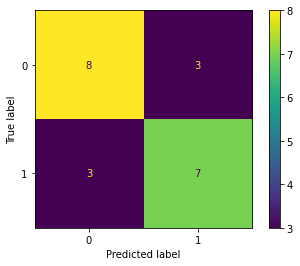

In [ ]:
disp = ConfusionMatrixDisplay(matrix)
disp.plot()